In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
Heart =pd.read_csv('heart.csv')

In [3]:
Heart= pd.DataFrame(Heart)
Heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
Heart.info

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

In [5]:
Heart.shape

(303, 14)

In [6]:
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
Heart.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [8]:
Heart.columns.values

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], dtype=object)

In [9]:
Heart.duplicated().sum()

1

In [10]:
# We will drop the Duplicate value:
Heart=Heart.drop_duplicates(keep="first")

In [11]:
outliers=[]
def outliers_z_score(Heart):
    threshold = 3
    mean_y = np.mean(Heart)
    stdev_y = np.std(Heart)
    for i in Heart:
        z_score=(i-mean_y)/stdev_y
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
#thalachh feature
a=outliers_z_score(Heart.thalachh)
for i in a:     
    Heart['thalachh'].iloc[Heart[Heart.thalachh==i].index]=np.nan
#chol feature
b=outliers_z_score(Heart.chol)
for i in b:     
    Heart['chol'].iloc[Heart[Heart.chol==i].index]=np.nan
#oldpeak feature
c=outliers_z_score(Heart.oldpeak)
for i in c:
    Heart['oldpeak'].iloc[Heart[Heart.oldpeak==i].index]=np.nan
#imputing nan values
Heart['new_thalachh']=Heart.thalachh.fillna(Heart.thalachh.mean())
Heart['new_chol']=Heart.chol.fillna(Heart.chol.mean())
Heart['new_oldpeak']=Heart.oldpeak.fillna(Heart.oldpeak.mean())

In [12]:
Heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,new_thalachh,new_chol,new_oldpeak
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1,150.0,233.0,2.3
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1,187.0,250.0,3.5
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1,172.0,204.0,1.4
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1,178.0,236.0,0.8
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1,163.0,354.0,0.6


In [13]:
comparision_cols=np.where(Heart['oldpeak']== Heart['new_oldpeak'],True,False)
comparision_cols
count=np.count_nonzero(comparision_cols)
count

300

In [14]:
Heart=Heart[~Heart['oldpeak'].isna()]

In [15]:
Heart=Heart[~Heart['thalachh'].isna()]

In [16]:
Heart=Heart[~Heart['chol'].isna()]

<AxesSubplot:xlabel='age'>

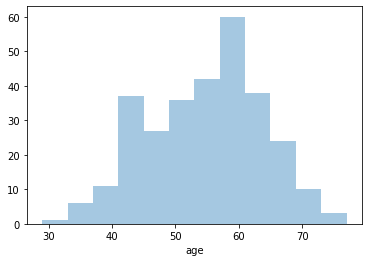

In [17]:
sns.distplot(Heart['age'],kde = False)

<AxesSubplot:xlabel='age', ylabel='count'>

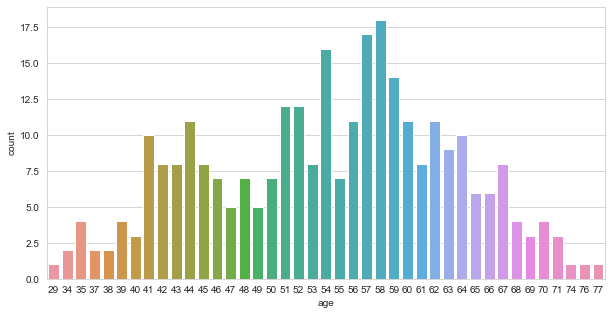

In [18]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='age',data=Heart)

<AxesSubplot:xlabel='sex'>

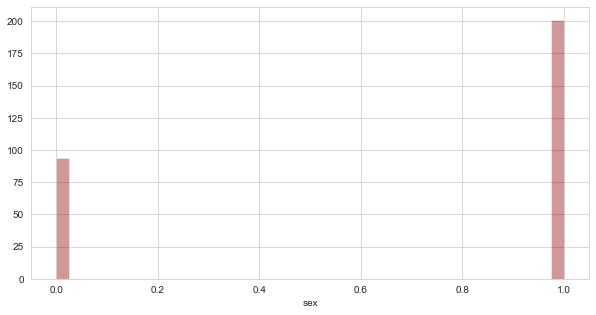

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(Heart['sex'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='sex', ylabel='count'>

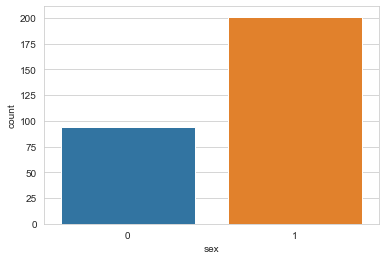

In [20]:
sns.countplot(x='sex',data=Heart)

Text(0.5, 1.0, 'Chest pain type')

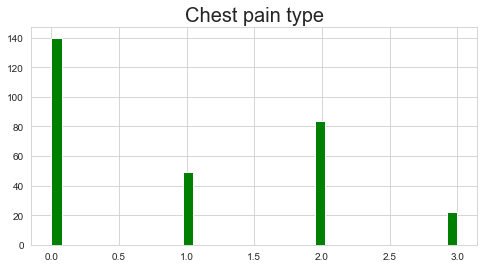

In [21]:
Heart['cp'].hist(color='green',bins=40,figsize=(8,4))
plt.title("Chest pain type",fontsize=20)

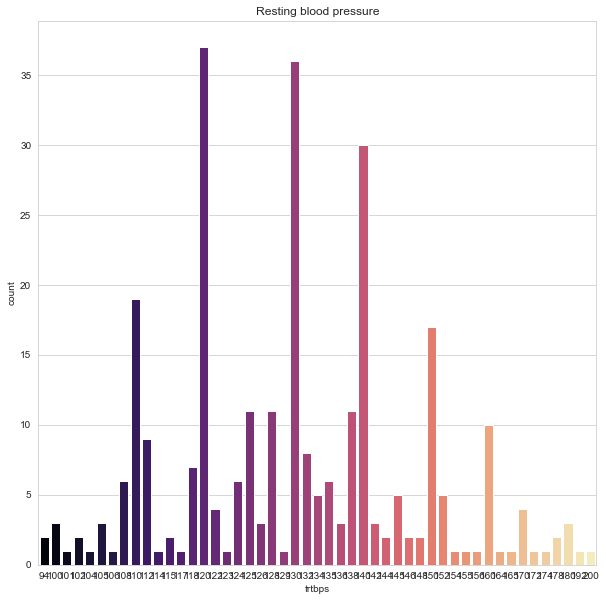

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'trtbps', data = Heart, palette = 'magma')
plt.title('Resting blood pressure')
plt.show()

<AxesSubplot:title={'center':' Cholestoral '}, xlabel='chol', ylabel='count'>

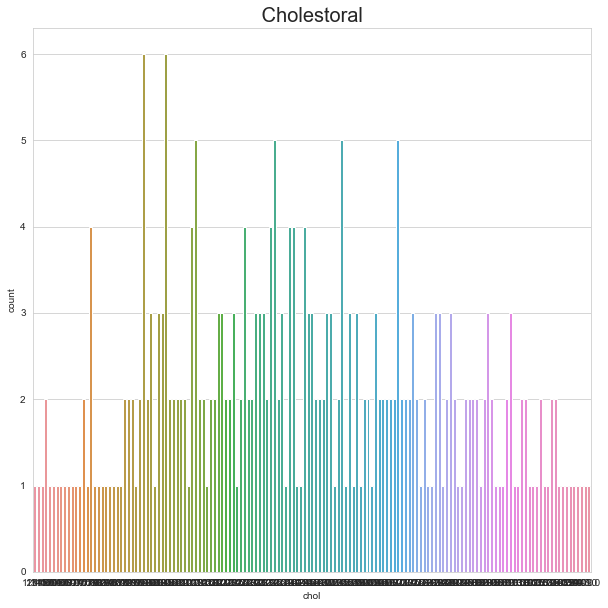

In [23]:
plt.figure(figsize=(10,10))
plt.title(" Cholestoral ",fontsize=20)
sns.countplot(x='chol',data=Heart)

<AxesSubplot:title={'center':'Fasting blood sugar'}, xlabel='fbs', ylabel='Density'>

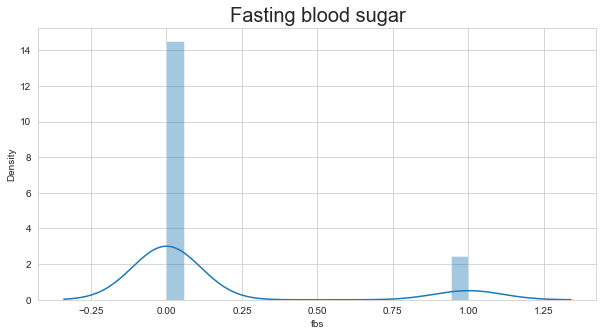

In [24]:
plt.figure(figsize=(10,5))
plt.title("Fasting blood sugar",fontsize=20)
sns.distplot(Heart['fbs'])

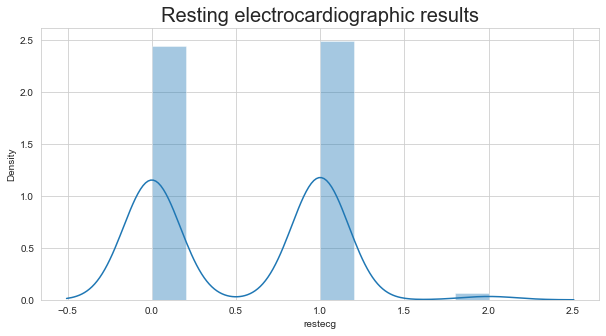

In [25]:
plt.figure(figsize=(10,5))
plt.title("Resting electrocardiographic results",fontsize=20)
sns.distplot(Heart['restecg'].dropna(),bins=10)
plt.show()

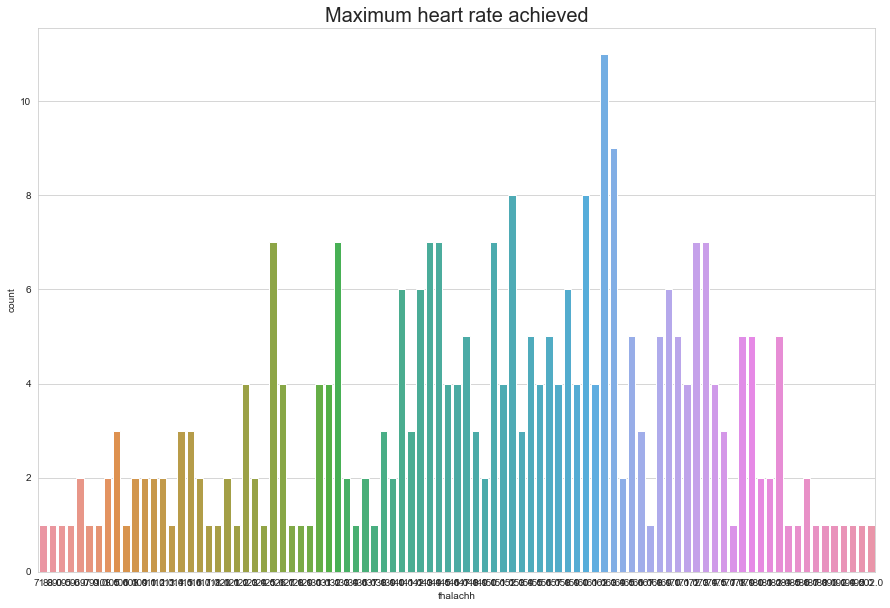

In [26]:
plt.figure(figsize=(15,10))
plt.title("Maximum heart rate achieved",fontsize=20)
sns.countplot(x='thalachh',data=Heart)
plt.show()

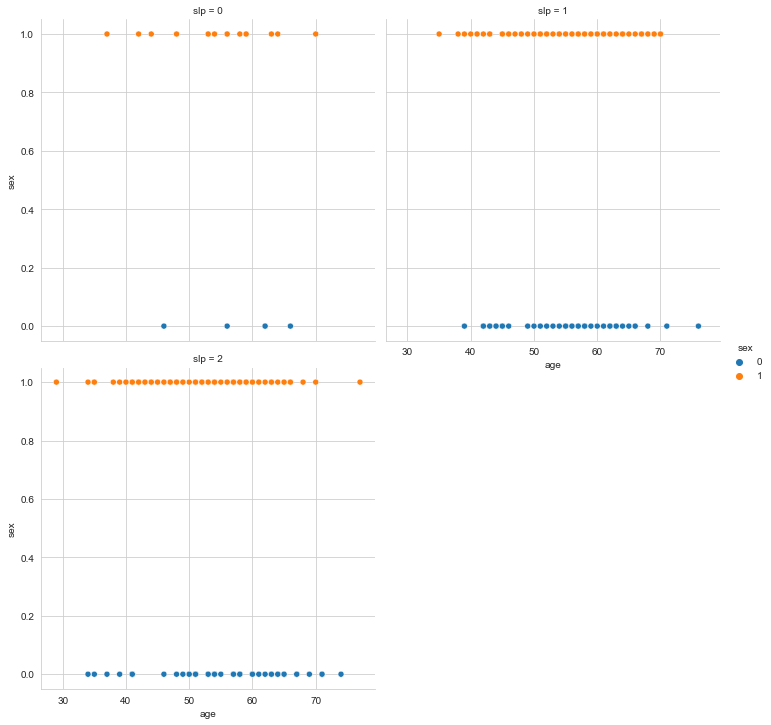

In [27]:
sns.relplot(data=Heart, x="age", y="sex",hue='sex',col="slp", col_wrap=2)

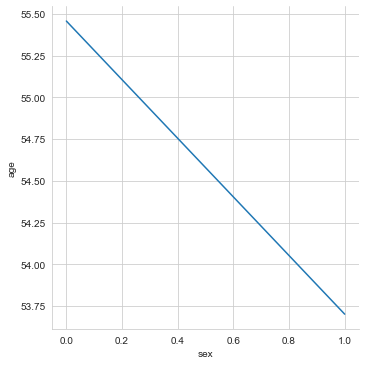

In [28]:
sns.relplot(data=Heart, x="sex", y="age",kind="line",ci=None)

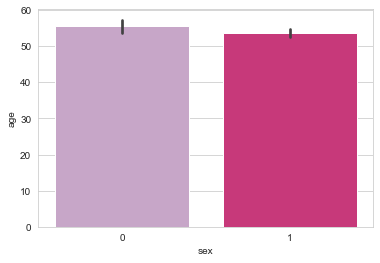

In [29]:
sns.barplot(x = 'sex', y = 'age', data =Heart,
            palette = 'PuRd')
plt.show()

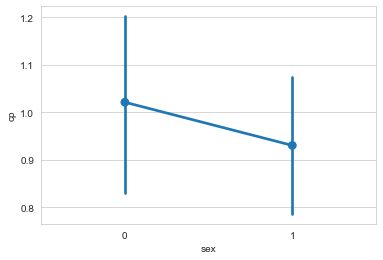

In [30]:
sns.pointplot(x="sex", y="cp", data=Heart)
plt.show()

<AxesSubplot:xlabel='age', ylabel='cp'>

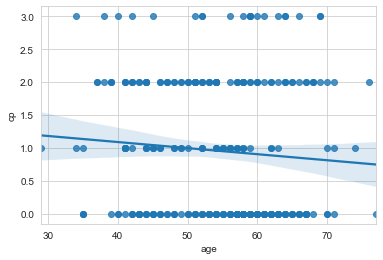

In [31]:
sns.regplot(x="age", y="cp", data=Heart)

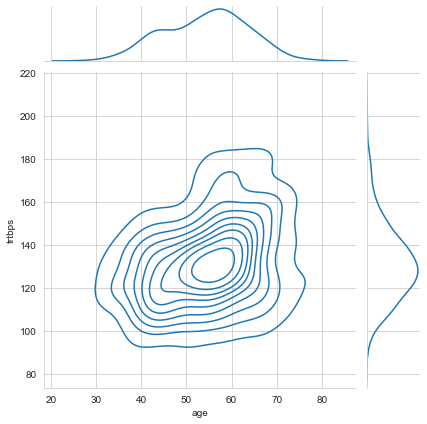

In [32]:
sns.jointplot(x='age', y='trtbps', data=Heart, kind='kde')

<AxesSubplot:xlabel='age', ylabel='fbs'>

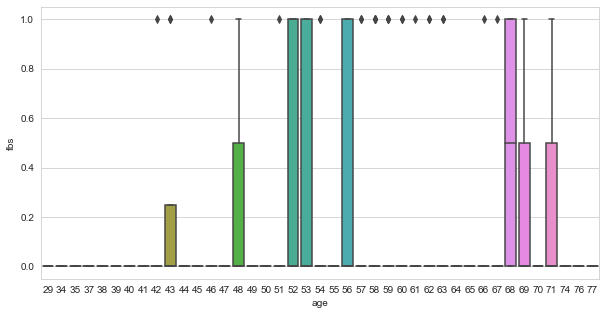

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x="age", y="fbs", data=Heart)

<AxesSubplot:xlabel='age', ylabel='chol'>

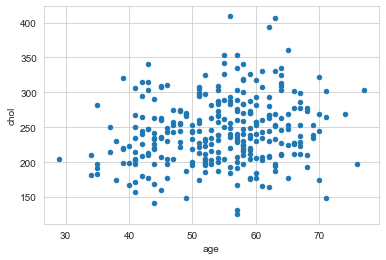

In [34]:
Heart.plot.scatter(x= "age" ,y ="chol")

<AxesSubplot:xlabel='age', ylabel='trtbps'>

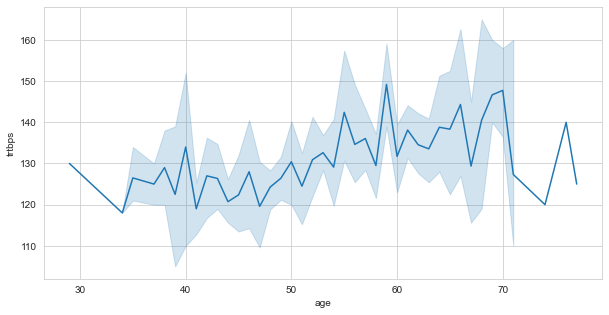

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(y="trtbps",x="age",data=Heart)

<AxesSubplot:xlabel='restecg', ylabel='age'>

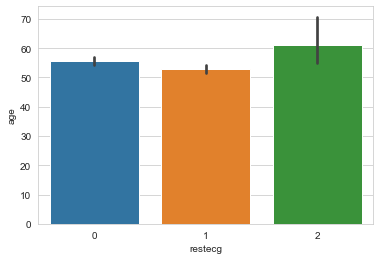

In [36]:
sns.barplot(x='restecg', y='age', data=Heart)

<AxesSubplot:xlabel='thalachh', ylabel='age'>

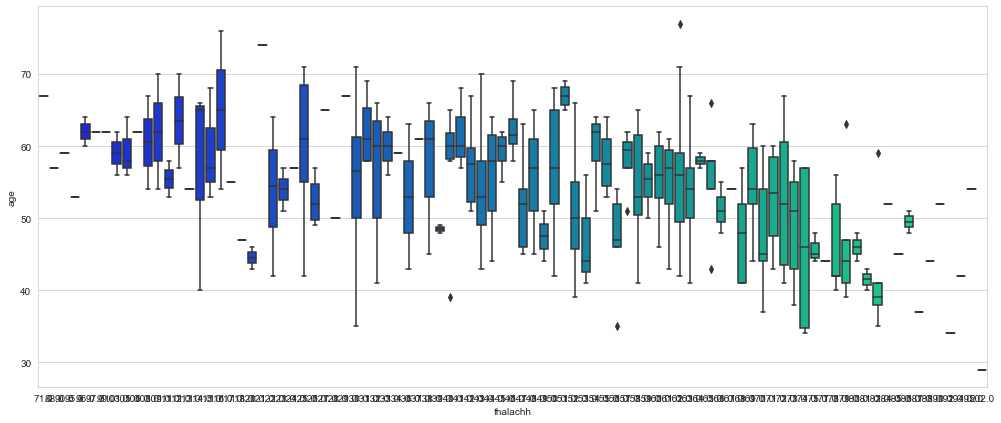

In [37]:
plt.figure(figsize=(17, 7))
sns.boxplot(x='thalachh',y='age',data=Heart,palette='winter')

<AxesSubplot:xlabel='age', ylabel='cp'>

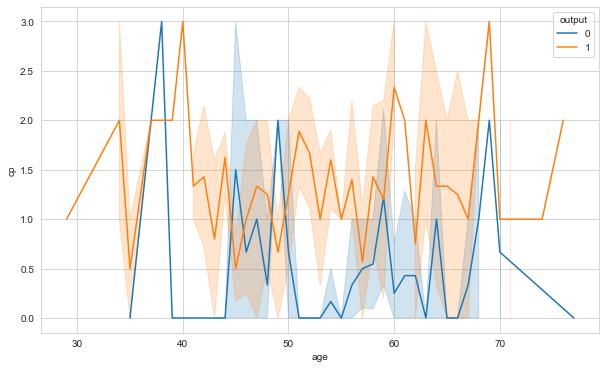

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="cp",hue="output",data=Heart)

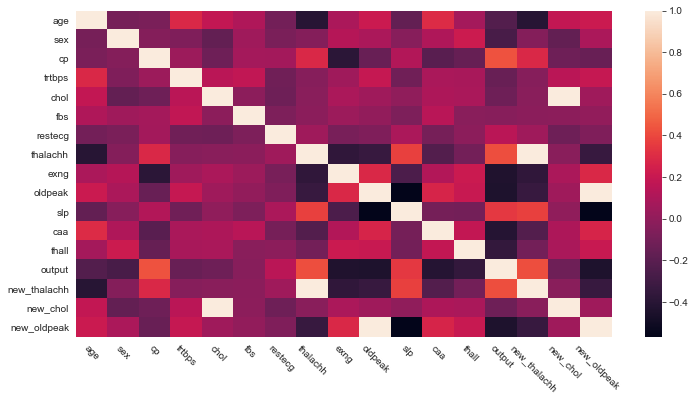

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(Heart.corr());
plt.xticks(rotation=-45);

In [40]:
X=Heart.iloc[:,0:13]
y=Heart.iloc[:,13]

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [43]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

In [44]:
import math
math.sqrt(len(y_test)

SyntaxError: unexpected EOF while parsing (<ipython-input-44-10d28f5cbffb>, line 2)

In [ ]:
scores=[]
for i in range(1,50):
    classifier =KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean')
    classifier.fit(X_train,y_train)
    scores.append(accuracy_score(y_test,classifier.predict(X_test)))
scores

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred =classifier.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
f1_score(y_test,y_pred)